In [5]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Only get data analyst jobs in the US
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

# Drop NaN values in salary_year_avg
df_US = df_US.dropna(subset=['salary_year_avg'])

In [6]:
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

C:\Users\cuanl\AppData\Local\Temp\ipykernel_8472\973810057.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


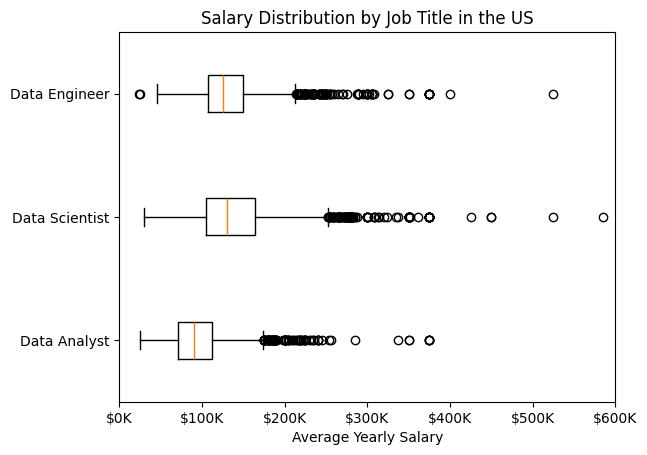

In [12]:
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution by Job Title in the US')
plt.xlabel('Average Yearly Salary')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()